In [5]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import turtle
from subs2vec.vecs import Vectors

sns.set_style('white')

In [14]:
def paint_from_text(text, alpha=.15, linewidth=10, colormap=plt.cm.YlOrRd, map_reverse=True):
    
    if map_reverse:
        plt.rcParams['axes.prop_cycle'] = plt.cycler(
            'color',
            colormap(np.hstack([np.linspace(1, 0, len(text)), np.linspace(0, 1, len(text))]))
        )
    else:
        plt.rcParams['axes.prop_cycle'] = plt.cycler(
            'color',
            colormap(np.hstack([np.linspace(0, 1, len(text)), np.linspace(1, 0, len(text))]))
        )                        
        
    fig, ax = plt.subplots(figsize=(6, 8))
    ax.set(xticklabels=[], yticklabels=[], facecolor='white')
    sns.despine(bottom=True, left=True)

    for i, word in enumerate(text):
        ax.plot(np.linspace(0, len(word), len(word)), word + (i / len(text)),
                alpha=alpha,
                linewidth=linewidth)

    for i, word in enumerate(text):
        ax.plot(np.linspace(0, len(word), len(word)), word + (-(len(text) - i) / len(text)) - .5,
                alpha=alpha,
                linewidth=linewidth)
    
    return fig, ax

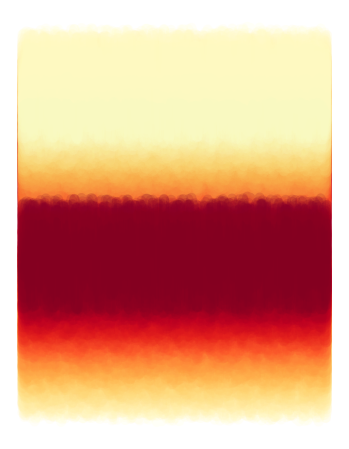

In [15]:
text = np.random.rand(265, 300)
fig, ax = paint_from_text(text)
plt.savefig('cover.png', dpi=300)

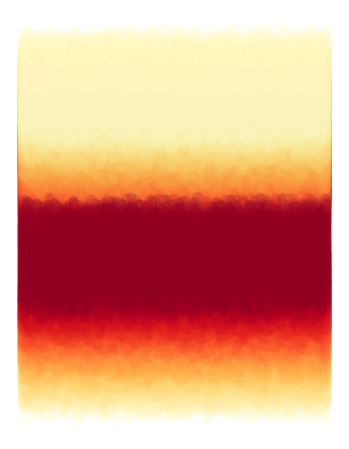

In [16]:
text = np.random.rand(140, 300)
fig, ax = paint_from_text(text)
plt.savefig('cover.png', dpi=300)

In [293]:
# read story
with open('worm_school.txt', 'r') as wormfile:
    text = wormfile.read()
print(text)

My favourite colour is brown. That's because mud is brown and I really, really, really like mud. My favourite things are other worms. And my hobby is digging holes in the ground. There is nothing I enjoy more than making a complicated underground tunnel system. But when I met Laurence, everything changed. Let me tell you about how I met him... I was digging a hole, like I usually do (like all worms do), but I must have fallen asleep because the next thing that happened was that I was flying a spaceship in outer space. The spaceship was made out of potatoes. Then, I dreamt I fell out of a can into a cereal bowl. Staring at me was a scruffy, fat bird who looked a lot like a chicken. It was a really good dream until it got to the bird part. The bird had intense and scary eyes. The worst thing was that the last part of the dream wasn't a dream at all. I really had been in a can and there really was a big, fat bird staring at me! What would you do if you were a worm and there was a bird two

In [298]:
# clean text
text = ''.join([l for l in text if l not in ['.', ',', '?', '!', '"', "'", '(', ')', ':']]).lower()
print(text)

my favourite colour is brown thats because mud is brown and i really really really like mud my favourite things are other worms and my hobby is digging holes in the ground there is nothing i enjoy more than making a complicated underground tunnel system but when i met laurence everything changed let me tell you about how i met him i was digging a hole like i usually do like all worms do but i must have fallen asleep because the next thing that happened was that i was flying a spaceship in outer space the spaceship was made out of potatoes then i dreamt i fell out of a can into a cereal bowl staring at me was a scruffy fat bird who looked a lot like a chicken it was a really good dream until it got to the bird part the bird had intense and scary eyes the worst thing was that the last part of the dream wasnt a dream at all i really had been in a can and there really was a big fat bird staring at me what would you do if you were a worm and there was a bird two centimetres away from your f

In [299]:
# split into words and convert to vectors
text = text.split(' ')
print(text)

['my', 'favourite', 'colour', 'is', 'brown', 'thats', 'because', 'mud', 'is', 'brown', 'and', 'i', 'really', 'really', 'really', 'like', 'mud', 'my', 'favourite', 'things', 'are', 'other', 'worms', 'and', 'my', 'hobby', 'is', 'digging', 'holes', 'in', 'the', 'ground', 'there', 'is', 'nothing', 'i', 'enjoy', 'more', 'than', 'making', 'a', 'complicated', 'underground', 'tunnel', 'system', 'but', 'when', 'i', 'met', 'laurence', 'everything', 'changed', 'let', 'me', 'tell', 'you', 'about', 'how', 'i', 'met', 'him', 'i', 'was', 'digging', 'a', 'hole', 'like', 'i', 'usually', 'do', 'like', 'all', 'worms', 'do', 'but', 'i', 'must', 'have', 'fallen', 'asleep', 'because', 'the', 'next', 'thing', 'that', 'happened', 'was', 'that', 'i', 'was', 'flying', 'a', 'spaceship', 'in', 'outer', 'space', 'the', 'spaceship', 'was', 'made', 'out', 'of', 'potatoes', 'then', 'i', 'dreamt', 'i', 'fell', 'out', 'of', 'a', 'can', 'into', 'a', 'cereal', 'bowl', 'staring', 'at', 'me', 'was', 'a', 'scruffy', 'fat', 

In [300]:
len(text)

265

In [301]:
len(set(text))

140